In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json import encoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib

In [2]:
# Load the dataset
data = pd.read_csv("data/50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
encoder = LabelEncoder()

In [7]:



data['State'] = encoder.fit_transform(data['State'])

In [8]:
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'California': np.int64(0), 'Florida': np.int64(1), 'New York': np.int64(2)}


In [9]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [10]:
x = data.drop(columns="Profit")
y = data["Profit"]

In [11]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [12]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train, y_train)

LinearRegression()

In [16]:
y_train

48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [17]:
y_pred = model.predict(x_test)
mean_abs_err = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_abs_err)

mean_sq_err = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error: ", mean_sq_err)

r2 = r2_score(y_test, y_pred)*100
print("R2 Score: ", r2)
print(model.score(x_test, y_test)*100)

Mean Absolute Error:  6871.824239376643
Mean Squared Error:  89876686.8585275
R2 Score:  86.8040339593121
86.8040339593121


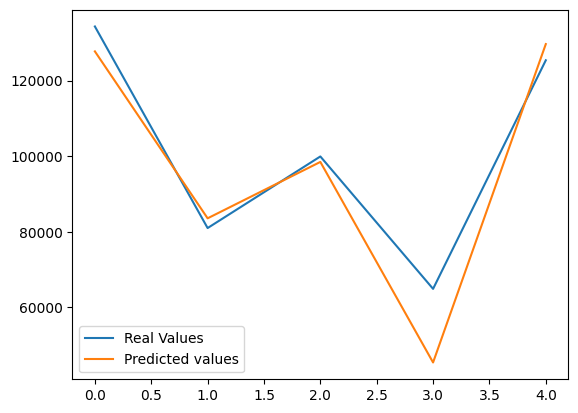

In [18]:
y_test_values = y_test.values.flatten()

plt.plot(y_test_values, label="Real Values")
plt.plot(y_pred, label="Predicted values")
plt.legend()
plt.show()

In [19]:
joblib.dump(model, "profit_model.joblib")

['profit_model.joblib']